In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import cluster as clu
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import datasets as dat
from sklearn import decomposition as dec
from sklearn import manifold as man
from scipy.cluster import hierarchy
from sklearn import compose as com
import plotly.graph_objects as go
from sklearn import neighbors as nn
from sklearn import metrics as met

In [ ]:
data1 = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv")
data1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv")
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
data.drop(["country", "continent"], axis=1, inplace=True)
data

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9
...,...,...,...,...
188,333,100,3,7.7
189,111,2,1,2.0
190,6,0,0,0.1
191,32,19,4,2.5


In [ ]:
data.dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [ ]:
data.isnull().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

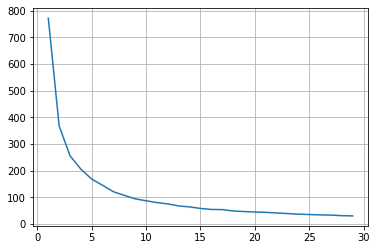

In [ ]:
x_values = []
y_values = []

for i in range(1, 30):
  pipe = pip.Pipeline([
            ("scaler", pre.StandardScaler()),
            ("clu", clu.KMeans(n_clusters=i, random_state=42))
  ])

  pipe.fit(data)
  x_values.append(i)
  y_values.append(pipe[1].inertia_)

plt.plot(x_values, y_values)
plt.grid(True)
plt.show()

In [ ]:
global_pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("clu", clu.KMeans(n_clusters=15, random_state=42)),
])

global_pipe.fit(data)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clu',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=15, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations =  data1.country,
    locationmode = "country names",
    z = global_pipe[1].labels_,
    text = data1.country,
    colorscale = 'RdBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'ClusterNo:',
))

fig.update_layout(
    title_text='Clustering Results',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()